In [ ]:
#Ques1
import random
import string
def rangeof():
    return random.randint(3, 10)
with open("Ques1.txt","w") as file:
    str = string.ascii_letters
    for i in range(999):
        randoms = ''.join(random.choices(str,k=rangeof()))
        file.write(randoms+'\n')

checking = open("Ques1.txt","r")
count=0
temp = '1'
while temp!='':
    temp=checking.readline()
    print(temp)
    count+=1
print(count)

In [ ]:
#Ques2
import random
import string

with open("Ques2.txt", "w") as file:
    alphabet = string.ascii_letters
    for i in range(50000):
        randoms = ''.join(random.choices(alphabet, k=100))
        file.write(randoms + '\n')

import os
file_path = r'C:\Users\prave\OneDrive\Desktop\Summer School\Ques2.txt'
print(os.path.getsize(file_path))


In [ ]:
#Ques3
import random
import string
import os

for file_num in range(1, 11):
    file_name = f"Ques3_{file_num}.txt"
    file_path = os.path.join(r'C:\Users\prave\OneDrive\Desktop\Summer School', file_name)

    with open(file_path, "w") as file:
        alphabet = string.ascii_letters
        for i in range(50000):
            randoms = ''.join(random.choices(alphabet, k=100))
            file.write(randoms + '\n')

    print(f"{file_name} created. Size: {os.path.getsize(file_path)} bytes.")


In [1]:
#Ques4
import random
import string
import os

def Createfiles(loopvalue, filename):
    with open(filename, "w") as file:
        alphabet = string.ascii_letters
        for i in range(loopvalue):
            randoms = ''.join(random.choices(alphabet, k=1000))
            file.write(randoms + '\n')

def get_file_size(file_path):
    return os.path.getsize(file_path)

loopvalues = [1000000, 2000000, 3000000, 4000000, 5000000]
file_num = 1

for value in loopvalues:
    file_name = f"Ques4_{file_num}.txt"
    Createfiles(value, file_name)
    file_path = r'C:\Users\prave\OneDrive\Desktop\Summer School\Ques4_{}.txt'.format(file_num)
    file_size = get_file_size(file_path)
    print(f"{file_name} created. Size: {file_size} bytes.")
    file_num += 1


FileNotFoundError: [WinError 2] The system cannot find the file specified: 'C:\\Users\\prave\\OneDrive\\Desktop\\Summer School\\Ques4_1.txt'

In [ ]:
#Ques5
def convert_to_uppercase(filename):
    with open(filename, "r+") as file:
        content = file.read()
        new_content = content.upper()
        file.seek(0)
        file.write(new_content)
        file.truncate()

files = ["Ques4_1.txt", "Ques4_2.txt", "Ques4_3.txt", "Ques4_4.txt", "Ques4_5.txt"]

for filename in files:
    convert_to_uppercase(filename)


In [ ]:
#Ques6
from threading import *
from time import sleep

class FileThread(Thread):
    def __init__(self, filename):
        super().__init__()
        self.filename = filename

    def run(self):
        with open(self.filename, "r+") as file:
            content = file.read()
            new_content = content.upper()
            file.seek(0)  # Move the file pointer to the beginning
            file.write(new_content)
            file.truncate()  # Remove any remaining content if new_content is shorter
            sleep(2)

# Create instances of the thread for each file
files = ["Ques4_1.txt", "Ques4_2.txt", "Ques4_3.txt", "Ques4_4.txt", "Ques4_5.txt"]
threads = [FileThread(filename) for filename in files]

# Start all threads
for thread in threads:
    thread.start()

# Wait for all threads to finish
for thread in threads:
    thread.join()


In [2]:
#Ques7
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()

search_query = "cat"
arguments = {"keywords": search_query, "limit":10, "format": "jpg"}

response.download(arguments)



Item no.: 1 --> Item name = cat
Evaluating...
Starting Download...


Unfortunately all 10 could not be downloaded because some images were not downloadable. 0 is all we got for this search filter!

Errors: 0



({'cat': []}, 0)

In [3]:
#Ques8 
from pytube import YouTube

def download_machine_learning_videos(search_query, num_videos):
    query = search_query + " tutorial"  # Adding "tutorial" to get more educational videos.
    video = YouTube.search(query, limit=num_videos)

    for v in video:
        try:
            stream_now = v.streams.filter(file_extension="mp4", progressive=True).first()
            if stream:
                video_title = v.title
                print(f"Downloading '{video_title}'...")
                stream.download(output_path="videos")
                print(f"Video '{video_title}' downloaded successfully!")
        except Exception as e:
            print(f"Error occurred while downloading video: {str(e)}")

if __name__ == "__main__":
    search_query = "Machine Learning"
    num_videos = 10

    download_machine_learning_videos(search_query, num_videos)

ModuleNotFoundError: No module named 'pytube'

In [5]:
#Ques9 import os
from moviepy.video.io.VideoFileClip import VideoFileClip

def audio(video_path):
    try:
        video_clip = VideoFileClip(video_path)
        audio_clip = video_clip.audio
        audio_filename = os.path.splitext(os.path.basename(video_path))[0] + ".mp3"
        audio_clip.write_audiofile(audio_filename)

        print(f"Audio extracted from '{video_path}' and saved as '{audio_filename}'")
        audio_clip.close()
        video_clip.close()
    except Exception as e:
        print(f"Error occurred while converting video to audio: {str(e)}")

if __name__ == "__main__":
    video_folder = "videos"
    
    video_files = [f for f in os.listdir(video_folder) if f.endswith(".mp4")]

    for video_file in video_files:
        video_path = os.path.join(video_folder, video_file)


ModuleNotFoundError: No module named 'moviepy'

In [6]:
#Ques11
import os
import threading
from google_images_download import google_images_download
from PIL import Image

def download(keyword, num_images, output_folder):
    response = google_images_download.googleimagesdownload()

    arguments = {
        "keywords": keyword,
        "limit": num_images,
        "print_urls": True,
        "output_directory": output_folder
    }

    try:
        paths = response.download(arguments)
        print("Images downloaded successfully!")
    except Exception as e:
        print(f"Error occurred: {str(e)}")

def rescale(image_path, output_folder, scale_percent):
    try:
        img = Image.open(image_path)
        width, height = img.size
        new_width = int(width * scale_percent / 100)
        new_height = int(height * scale_percent / 100)
        resized_img = img.resize((new_width, new_height))
        new_image_path = os.path.join(output_folder, os.path.basename(image_path))
        resized_img.save(new_image_path)
        print(f"Image '{os.path.basename(image_path)}' rescaled to 50% and saved as '{os.path.basename(new_image_path)}'")
    except Exception as e:
        print(f"Error occurred while rescaling image: {str(e)}")

def process(image_path, output_folder, scale_percent):
    rescale(image_path, output_folder, scale_percent)
    os.remove(image_path)

if __name__ == "__main__":
    keyword = "Dog"
    num_images = 500
    output_folder = "images"
    scale_percent = 50
    num_threads = 10

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Create a list to hold the thread objects
    threads = []

    download(keyword, num_images, output_folder)

    # Get a list of all image files in the 'images' folder
    image_files = [f for f in os.listdir(output_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    for image_file in image_files:
        image_path = os.path.join(output_folder, image_file)

        # Create a thread for each image and start it
        thread = threading.Thread(target=process, args=(image_path, output_folder, scale_percent))
        thread.start()
        threads.append(thread)

        # Wait for a certain number of threads to finish before starting the next batch
        if len(threads) >= num_threads:
            for thread in threads:
                thread.join()
            threads = []

    # Wait for any remaining threads to finish
    for thread in threads:
        thread.join()

    print("All images downloaded and rescaled successfully.")


Item no.: 1 --> Item name = Dog
Evaluating...


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Looks like we cannot locate the path the 'chromedriver' (use the '--chromedriver' argument to specify the path to the executable.) or google chrome browser is not installed on your machine (exception: __init__() got an unexpected keyword argument 'chrome_options')
Traceback (most recent call last):
  File "C:\Users\prave\anaconda3\lib\site-packages\google_images_download\google_images_download.py", line 177, in download_extended_page
    browser = webdriver.Chrome(chromedriver, chrome_options=options)
TypeError: __init__() got an unexpected keyword argument 'chrome_options'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\prave\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\prave\AppData\Local\Temp/ipykernel_17460/3560971615.py", line 53, in <module>
    download(keyword, num_images, output_folder)
  File 

TypeError: object of type 'NoneType' has no len()

In [7]:
#Ques10
import os
import threading
from pytube import YouTube
from moviepy.editor import VideoFileClip

def download_video(url, output_dir):
    try:
        yt = YouTube(url)
        video = yt.streams.filter(file_extension='mp4', progressive=True).first()

        # Download the video
        print(f"Downloading: {yt.title}...")
        video.download(output_path=output_dir)
        print(f"Downloaded: {yt.title}")
    except Exception as e:
        print(f"Error downloading {url}: {e}")

def convert_to_audio(video_path, output_dir):
    try:
        video_clip = VideoFileClip(video_path)
        audio_clip = video_clip.audio

        # Generate the output audio file name
        audio_file = os.path.join(output_dir, os.path.splitext(os.path.basename(video_path))[0] + ".mp3")

        # Convert and save the audio file
        print(f"Converting to audio: {video_path}...")
        audio_clip.write_audiofile(audio_file)
        print(f"Converted to audio: {audio_file}")

        # Close the video and audio clips
        audio_clip.close()
        video_clip.close()
    except Exception as e:
        print(f"Error converting {video_path}: {e}")

def main():
    # Set the YouTube video URLs you want to download
    video_urls = [
        "https://www.youtube.com/watch?v=VIDEO_ID_1",
        "https://www.youtube.com/watch?v=VIDEO_ID_2",
        # Add more video URLs here...
    ]

    # Set the output directories
    video_output_dir = "videos"
    audio_output_dir = "audios"

    # Create output directories if they don't exist
    os.makedirs(video_output_dir, exist_ok=True)
    os.makedirs(audio_output_dir, exist_ok=True)

    # Download videos using multithreading
    download_threads = []
    for url in video_urls:
        t = threading.Thread(target=download_video, args=(url, video_output_dir))
        t.start()
        download_threads.append(t)

    # Wait for all download threads to finish
    for t in download_threads:
        t.join()

    # Convert videos to audio using multithreading
    convert_threads = []
    for video_file in os.listdir(video_output_dir):
        video_path = os.path.join(video_output_dir, video_file)
        t = threading.Thread(target=convert_to_audio, args=(video_path, audio_output_dir))
        t.start()
        convert_threads.append(t)

    # Wait for all convert threads to finish
    for t in convert_threads:
        t.join()

if __name__ == "__main__":
    main()


ModuleNotFoundError: No module named 'pytube'

In [3]:
#Ques12
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import preprocessing

# Set the number of rows and columns for the dataset
num_rows = 100
num_columns = 30

# Create a random DataFrame with values between 1 and 200
data = np.random.randint(1, 201, size=(num_rows, num_columns))

# Create column names 
column_names = [f"Column_{i+1}" for i in range(num_columns)]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns=column_names)

# Display the first few rows of the DataFrame
print(df.head())

#(i)
df.replace(np.arange(10,61),np.nan,inplace=True)
Nan_count = df.isna().sum().sum()
print(Nan_count)
print("(i)")
print(df.head())

#(ii)
for i in range(1,31):
    newdf = df[f'Column_{i}']
    avg = newdf.mean()
    newdf.fillna(avg,inplace=True)
print("(ii)")
print(df.head())
#(ii)
#df.corr() functions calculates pearson coeff for all cols
correlations = df.corr()
print("(iii)")
#Creating heatmap
#sb.heatmap(correlations)
print(correlations[correlations.abs()<=0.7])
#(iv)
print("(iv)")
#  Normalizing all the values in the dataset between 0 and 10.
dataset_normalized = (df - df.min()) / (df.max() - df.min()) * 10
print(dataset_normalized.head(3))
#(v)
print("(v)")
dataset_mapped = dataset_normalized.applymap(lambda i: 1 if i<=0.5 else 0)
print(dataset_mapped.head(2))

   Column_1  Column_2  Column_3  Column_4  Column_5  Column_6  Column_7  \
0         1       134       130       160        48        71        44   
1       112       171        26       125        79        62        33   
2       165       112       175       161       180        37        24   
3         1       199        15       137       195        47        57   
4       145        73       139       188        57       187        69   

   Column_8  Column_9  Column_10  ...  Column_21  Column_22  Column_23  \
0        68        44        112  ...         74         16        156   
1       116        63        119  ...         69        134          3   
2       173        60        199  ...         36         62        107   
3        86         9         96  ...        130         87        167   
4        70       178         32  ...        135        146         84   

   Column_24  Column_25  Column_26  Column_27  Column_28  Column_29  Column_30  
0          9        158

   Column_1  Column_2  Column_3  Column_4   Column_5   Column_6   Column_7  \
0 -8.857792  6.145774 -0.638868 -6.272979  12.310942  17.264785  18.059494   
1 -2.371105 -6.236909 -5.880227  9.447489  15.659969  19.110684  11.442761   
2 -6.806734 -4.840219  4.990696  5.526503  13.243232  16.968109  16.311874   

    Column_8   Column_9  Column_10  
0  14.631984  34.704011 -18.311459  
1  14.942917  66.996548   5.805680  
2  15.478535 -12.457155 -17.984570  


C:\Users\prave\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Elbow curve plot


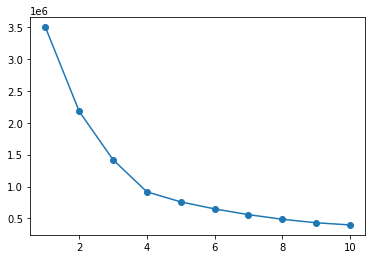

In [33]:
#Ques13
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
# Set the number of rows and columns for the dataset
num_rows = 500
num_columns = 10

data = np.zeros((num_rows, num_columns))

# Columns 1-4: Random values between -10 and 10
data[:, 0:4] = np.random.uniform(-10, 10, size=(num_rows, 4))

# Columns 5-8: Random values between 10 and 20
data[:, 4:8] = np.random.uniform(10, 20, size=(num_rows, 4))

# Columns 9-10: Random values between -100 and 100
data[:, 8:] = np.random.uniform(-100, 100, size=(num_rows, 2))

# Create column names
column_names = [f"Column_{i+1}" for i in range(num_columns)]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns=column_names)

# Display the first few rows of the DataFrame
print(df.head(3)) 

#K-means clustering
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)
print("Elbow curve plot")
plt.plot(range(1,11),wcss,marker='o')
#Elbow plot done to figure out the number of clusters
#Determined 10 clusters
optimal_clusters=4
X = df.iloc[:,:].values #transforming data into np array for ease
km = KMeans(n_clusters=optimal_clusters,random_state=42)
y_means = km.fit_predict(X)
# X[y_means == 0] , all the points in cluster 0

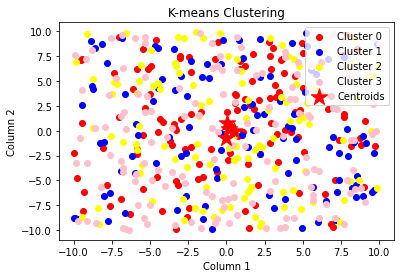

In [31]:
# Plot the clusters
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], color="red", marker='o', label="Cluster 0")
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], color="blue", marker='o', label="Cluster 1")
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], color="yellow", marker='o', label="Cluster 2")
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], color="pink", marker='o', label="Cluster 3")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('K-means Clustering')
plt.legend()
plt.show()

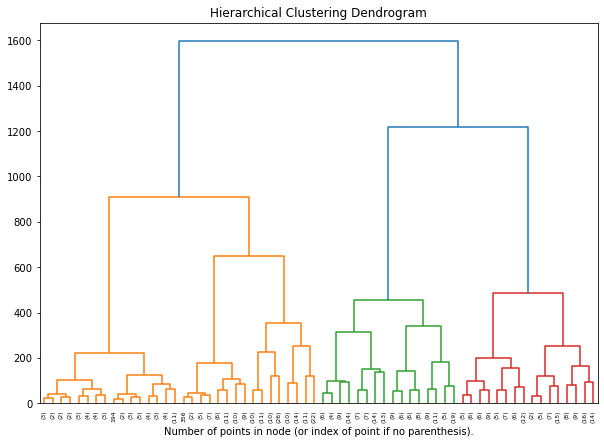

   Column_1  Column_2  Column_3  Column_4   Column_5   Column_6   Column_7  \
0 -8.857792  6.145774 -0.638868 -6.272979  12.310942  17.264785  18.059494   
1 -2.371105 -6.236909 -5.880227  9.447489  15.659969  19.110684  11.442761   
2 -6.806734 -4.840219  4.990696  5.526503  13.243232  16.968109  16.311874   
3  5.145050 -2.378146  0.297502 -0.319108  15.671389  16.291829  14.325156   
4 -9.763415 -7.128770  0.748154  8.346621  15.240977  12.634558  12.503137   

    Column_8   Column_9  Column_10  Hierarchical_Cluster  
0  14.631984  34.704011 -18.311459                     0  
1  14.942917  66.996548   5.805680                     0  
2  15.478535 -12.457155 -17.984570                     1  
3  17.503696  59.150537 -66.373476                     3  
4  18.583353  38.563466  61.492875                     0  


In [37]:
#Ques 13 (ii)
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Hierarchical Clustering
plt.figure(figsize=(10, 7))
linked = linkage(df, method='ward')  # Compute the linkage matrix
dendrogram_ = dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

optimal_hierarchical_k = 4
hierarchical_clustering = AgglomerativeClustering(n_clusters=optimal_hierarchical_k)
df['Hierarchical_Cluster'] = hierarchical_clustering.fit_predict(df)

print(df.head())


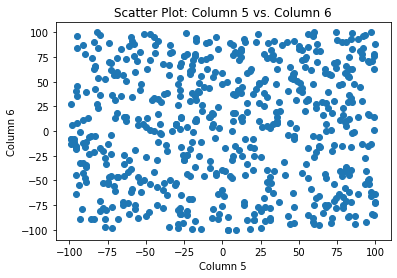

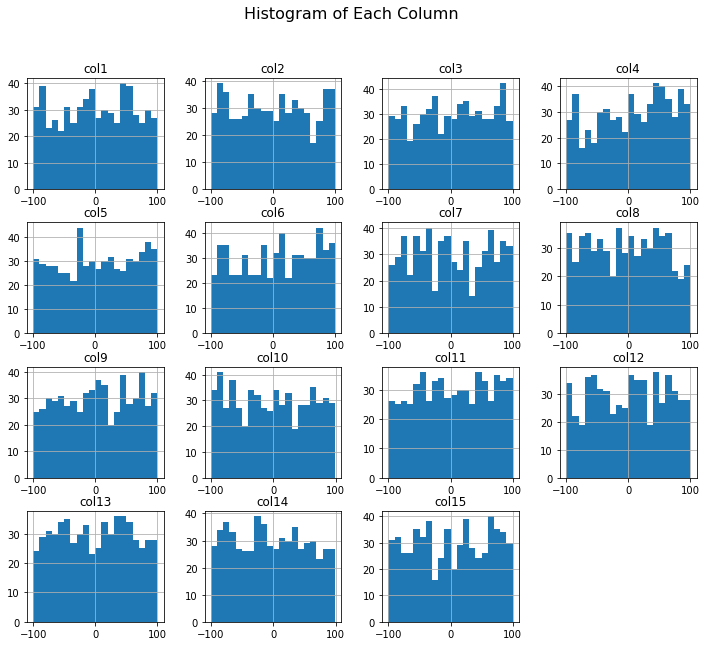

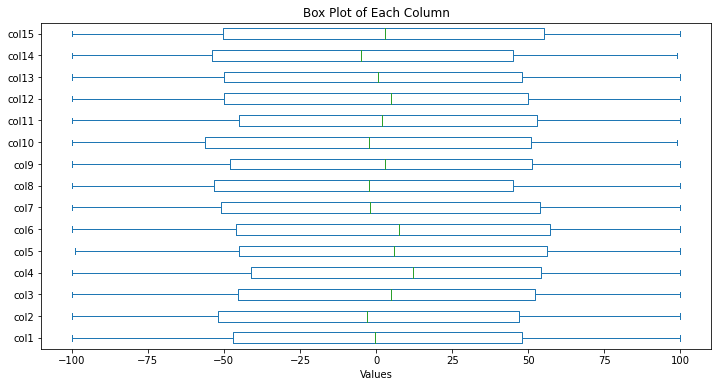

In [38]:
#Ques14
# Question 14
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
dataset = pd.DataFrame(np.random.randint(-100, 101, size=(600, 15)), columns=[f'col{i}' for i in range(1, 16)])

# a) 
plt.scatter(dataset['col5'], dataset['col6'])
plt.xlabel('Column 5')
plt.ylabel('Column 6')
plt.title('Scatter Plot: Column 5 vs. Column 6')
plt.show()

# b)
dataset.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histogram of Each Column', fontsize=16)
plt.show()

# c)
dataset.plot(kind='box', vert=False, figsize=(12, 6))
plt.title('Box Plot of Each Column')
plt.xlabel('Values')
plt.show()

In [39]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, ranksums

np.random.seed(42)
dataset = pd.DataFrame(np.random.uniform(5, 11, size=(500, 5)), columns=[f'col{i}' for i in range(1, 6)])

# i)
t_test_results = {}
for col in dataset.columns:
    t_stat, p_value = ttest_1samp(dataset[col], 7.5)  # Assuming a population mean of 7.5 for testing.
    t_test_results[col] = {'t-statistic': t_stat, 'p-value': p_value}

# ii)
wilcoxon_results = {}
for col in dataset.columns:
    statistic, p_value = wilcoxon(dataset[col] - 7.5)  # Assuming a population median of 7.5 for testing.
    wilcoxon_results[col] = {'statistic': statistic, 'p-value': p_value}

# iii)
col3 = dataset['col3']
col4 = dataset['col4']
two_sample_t_test = ttest_ind(col3, col4)
wilcoxon_ranksums_test = ranksums(col3, col4)

print("Results of T-Test:")
for col, results in t_test_results.items():
    print(f"Column {col}: t-statistic={results['t-statistic']}, p-value={results['p-value']}")

print("\nResults of Wilcoxon Signed Rank Test :")
for col, results in wilcoxon_results.items():
    print(f"Column {col}: statistic={results['statistic']}, p-value={results['p-value']}")

print("\nColumn 3 and Column 4 Two Sample T-Test Results:")
print(f"t-statistic={two_sample_t_test.statistic}, p-value={two_sample_t_test.pvalue}")

print("\nWilcoxon Rank Sum Test Results for Column 3 and Column 4:")
print(f"statistic={wilcoxon_ranksums_test.statistic}, p-value={wilcoxon_ranksums_test.pvalue}")

Results of T-Test:
Column col1: t-statistic=6.77775876353557, p-value=3.4537273607335936e-11
Column col2: t-statistic=5.612816544424771, p-value=3.306522801255001e-08
Column col3: t-statistic=6.624188477842643, p-value=9.058151477801183e-11
Column col4: t-statistic=6.330330815910786, p-value=5.455951878351686e-10
Column col5: t-statistic=6.244394397352239, p-value=9.110310433541527e-10

Results of Wilcoxon Signed Rank Test :
Column col1: statistic=42203.0, p-value=2.6488605751166575e-10
Column col2: statistic=45817.0, p-value=1.9932174370114757e-07
Column col3: statistic=43032.0, p-value=1.3479298896188877e-09
Column col4: statistic=43780.0, p-value=5.537253893280675e-09
Column col5: statistic=44181.0, p-value=1.1559007032644647e-08

Column 3 and Column 4 Two Sample T-Test Results:
t-statistic=0.09986315345229761, p-value=0.9204730253477937

Wilcoxon Rank Sum Test Results for Column 3 and Column 4:
statistic=0.1191248809558157, p-value=0.905176418944118
